# Introduction to Machine Learning

"Machine learning gives computers the ability to learn without explicitly programmed." - Arthur Samuel, 1959

Machine learning originated from pattern recognition and computational learning theory in AI. It is the study and construction of algorithms to learn from and make predictions on data through building a model from sample input.

### Some uses of learning algorithms
1. Classification: determine which discrete category the example is
2. Recognizing patterns: speech recognition, facial identity ...
3. Recommender Systems: noisy data, commercial pay-off (e.g., Amazon, Netflix)
4. Information retrieval: find documents or images with similar content
5. Computer vision: detection, segmentation, depth estimation, optical flow ...
6. Robotics: perception, planning ...
7. Learning to play games: AlphaGO
8. Recognizing anomalies: Unusual sequences of credit card transactions, panic situation at an airport
9. Spam filtering, fraud detection: The enemy adapts so we must adapt too

### Types of learning tasks
- Supervised Learning: correct output known for each training example for predicting output when given an input vector

    1. Classification: 1-of-N output, e.g. object recognition, medical diagnosis
    2. Regression: real-valued-output, e.g.predicting market prices, customer ratings


- Unsupervised Learning: for learning an internal representation of the input to capture regularities and structure in the data without any labels

    1. Clustering: dividing input into groups that are unknown beforehand
    2. Dimensionality reduction: extract informative features, e.g. PCA, t-SNE


- Reinforcement Learning: perform an action with the goal to maximize payoff by the feedback of reward and punishments, e.g. playing a game against an opponent

# In this tutorial

1. Regression (e.g. Linear Regression)
2. Classification (e.g. SVM, Logistic regression)
3. Clustering (e.g. K-means)
4. Dimensionality Reduction (e.g. PCA)
5. Sklearn's TPOT package for optimized machine learning pipelines

### We won't cover:
1. Other classification and clustering algorithms (e.g. Neural Networks, Hierarchical Clustering)
2. Model selection (such as Bayesian Information Criteria - BIC)
3. Hyper-parameter selection

## Useful websites
Sklearn class and function reference page
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Machine Learning course from Computer Science Department, UOFT
http://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/CSC411_Fall16.html

TPOT for optimized machine learning pipelines
https://rhiever.github.io/tpot/

KERAS package for Neural Networks
https://keras.io/

Tensorflow Playground for Deep Neural Networks
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69754&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [2]:
%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Datasets
import numpy as np
import pandas as pd
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


## Iris dataset
### Samples of 3 different species of Iris flower with 4 features (sepal and petal lengths and widths)
### We will learn:
- Displaying feature relationships, correlations
- Dimensionality reduction using PCA
- Scaling the data
- Classification and clustering algorithms
- Compare to another image dataset of handwritten digits

In [3]:
iris = datasets.load_iris()  # what type of data is this?
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# Feature Correlations
from scipy import stats

feature_corr = pd.DataFrame(columns = iris['feature_names'])
for i in range(4):
    corr = []
    for j in range(4):
        corr.append(stats.pearsonr(iris.data[:, i], iris.data[:, j])[0])
    feature_corr.loc[i, ] = corr
feature_corr = feature_corr.rename(index = {0: iris['feature_names'][0],
                                            1: iris['feature_names'][1],
                                            2: iris['feature_names'][2],
                                            3: iris['feature_names'][3]})
feature_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1


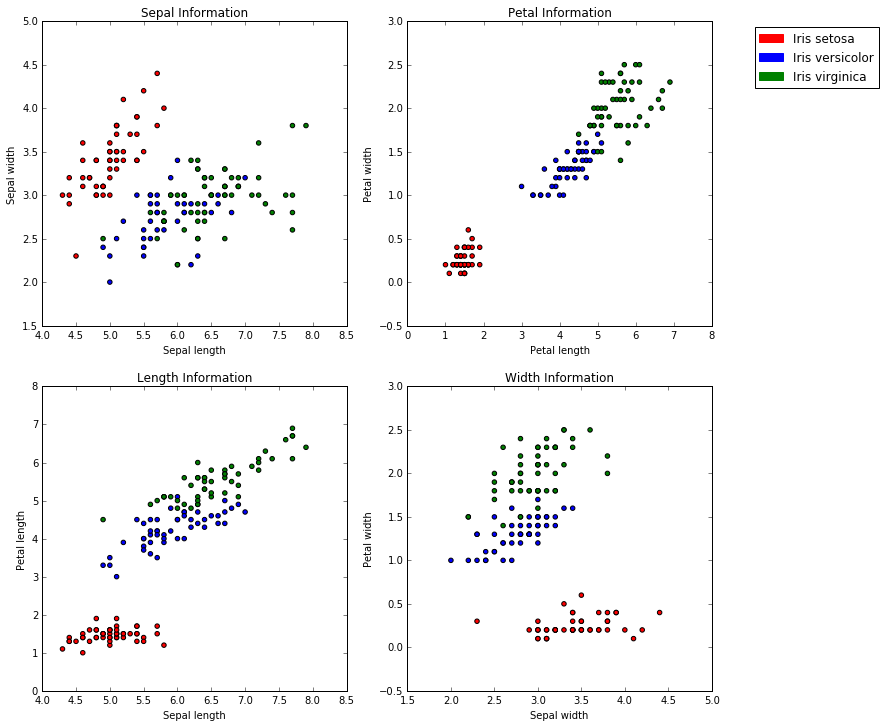

In [5]:
# Feature Relationships
X = iris.data
Y = iris.target
key = {0: ('red', 'Iris setosa'),
       1: ('blue', 'Iris versicolor'),
       2: ('green', 'Iris virginica')}
colors = [key[index][0] for index in Y]
# Plot the training points

# Sepal information
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Information')

# Petal information
plt.subplot(222)
plt.scatter(X[:, 2], X[:, 3], c=colors)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Information')

# Length information
plt.subplot(223)
plt.scatter(X[:, 0], X[:, 2], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Length Information')

# Width information
plt.subplot(224)
plt.scatter(X[:, 1], X[:, 3], c=colors)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Width Information')

# Plot legend
patches = [matplotlib.patches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()],
           bbox_to_anchor = (0.1,-0.1,1,1), bbox_transform = plt.gcf().transFigure)
plt.show()

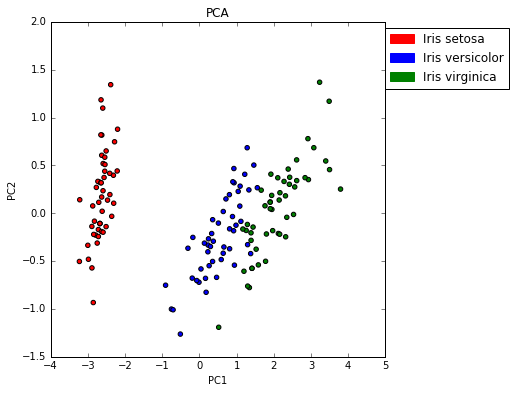

In [6]:
# Applying PCA to iris features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # number of principle components
iris_pca = pca.fit_transform(iris.data)  # 

plt.figure(figsize=(6, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend(handles=patches, labels=[label for _, label in key.values()],
           bbox_to_anchor = (0.2,-0.1,1,1), bbox_transform = plt.gcf().transFigure)
plt.show()

In [7]:
# Interpreting features from PCA
from scipy import stats

pca_corr = pd.DataFrame(columns = iris['feature_names'])
for i in range(2):
    print('PC%d explained variance = %.2f%s\n' % (i+1, pca.explained_variance_ratio_[i]*100, '%'))
    corr = []
    for j in range(4):
        corr.append(stats.pearsonr(iris_pca[:, i], iris.data[:, j])[0])
    pca_corr.loc[i, ] = corr
pca_corr = pca_corr.rename(index={0: 'PC1', 1: 'PC2'})
pca_corr

PC1 explained variance = 92.46%

PC2 explained variance = 5.30%



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.897545,-0.389993,0.997854,0.966484
PC2,0.390231,0.828313,-0.0490301,-0.0481802


In [1]:
# Scaling data
from sklearn import preprocessing

X = iris.data
Y = iris.target

# When the data is scaled to complete data
X_scaled = preprocessing.StandardScaler().fit_transform(X)
# When the data is scaled to a part of the data
#scaler = preprocessing.StandardScaler().fit(X)
#X_scaled = scaler.transform(X)

NameError: name 'iris' is not defined

In [ ]:
# Scaled Feature Relationships
# Plot the training points

# Sepal information
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Information')

# Petal information
plt.subplot(222)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=colors)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Information')

# Length information
plt.subplot(223)
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Length Information')

# Width information
plt.subplot(224)
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=colors)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.title('Width Information')

# Plot legend
patches = [matplotlib.patches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()],
           bbox_to_anchor = (0.1,-0.1,1,1), bbox_transform = plt.gcf().transFigure)
plt.show()

In [ ]:
# Applying PCA to iris features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca_scaled = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(iris_pca_scaled[:, 0], iris_pca_scaled[:, 1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Scaled Data')
plt.legend(handles=patches, labels=[label for _, label in key.values()],
           bbox_to_anchor = (0.2,-0.1,1,1), bbox_transform = plt.gcf().transFigure)
plt.show()

In [ ]:
# Interpreting features from PCA
from scipy import stats

pca_corr = pd.DataFrame(columns = iris['feature_names'])
for i in range(2):
    print('PC%d explained variance = %.2f%s\n' % (i+1, pca.explained_variance_ratio_[i]*100, '%'))
    corr = []
    for j in range(4):
        corr.append(stats.pearsonr(iris_pca_scaled[:, i], X_scaled[:, j])[0])
    pca_corr.loc[i, ] = corr
pca_corr = pca_corr.rename(index={0: 'PC1', 1: 'PC2'})
pca_corr

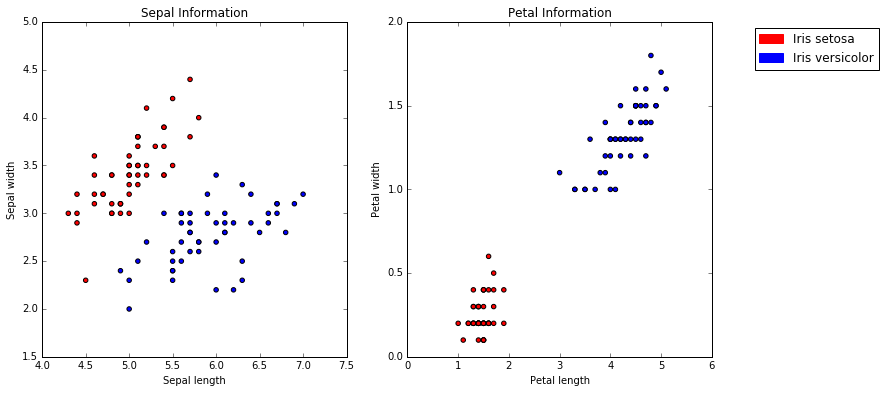

In [11]:
# Iris with 2 classes
iris_df2 = iris_df[(iris_df.target == 0) | (iris_df.target == 1)]

# Plot 2-Class Iris data
iris2 = np.asarray(iris_df2.iloc[:, :4])
Y2 = list(iris_df2.target)
key = {0: ('red', 'Iris setosa'),
       1: ('blue', 'Iris versicolor')}
colors = [key[index][0] for index in Y2]
# Plot the training points

# Sepal information
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(iris2[:, 0], iris2[:, 1], c=colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal Information')
# Width information
plt.subplot(122)
plt.scatter(iris2[:, 2], iris2[:, 3], c=colors)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Information')

# Plot legend
patches = [matplotlib.patches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()],
           bbox_to_anchor = (0.1,-0.1,1,1), bbox_transform = plt.gcf().transFigure)
plt.show()

In [ ]:
# Binary Classification - Logistic Regression and Linear Regression as a means of Classification
from sklearn import linear_model

# Model fit
#lr = linear_model.LogisticRegression()
lr = linear_model.LinearRegression()
lr.fit(iris2, Y2)
# Using some features
# lr.fit(iris2[:,:2], Y)

# Predict values
Y_pred = lr.predict(iris2)

# Calculate performance - accuracy
lr.score(iris2, Y2)

In [13]:
# Multiclass Classification - Logistic Regression
from sklearn import linear_model

# Load data to classify: Complete, partial, scaled, PCA applied
X = iris.data
#X = iris.data[:,:2]
#X = X_scaled
#X = iris_pca
Y = iris.target

# Model fit
lr_multi = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
lr_multi.fit(X, Y)

# Predict values
Y_pred = lr_multi.predict(X)

# Calculate performance - accuracy
lr_multi.score(X, Y)

0.97333333333333338

In [14]:
# Cross-validation
from sklearn.model_selection import train_test_split

# Split labeled data into training and test set
X = iris.data
#X = iris.data[:,:2]
#X = X_scaled
#X = iris_pca
X_train, X_test, Y_train, Y_test = train_test_split(X, iris.target, test_size=0.4, random_state=0)

print('Training set size')
print(X_train.shape, Y_train.shape)
print('Test set size')
print(X_test.shape, Y_test.shape)

# Model fit
lr_multi = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
lr_multi.fit(X_train, Y_train)

# Predict values
Y_pred = lr_multi.predict(X_test)

# Calculate performance - accuracy
lr_multi.score(X_test, Y_test)

Training set size
((90, 4), (90,))
Test set size
((60, 4), (60,))


0.91666666666666663

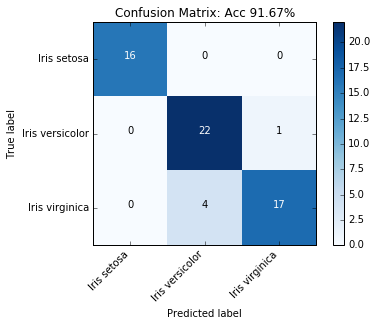

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

# Enter values
model = lr_multi
data = X_test
actual_target = Y_test
predicted_target = Y_pred
classes = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

# Calculates confusion matrix from actual and predicted target values
cnf = confusion_matrix(actual_target, predicted_target)
# Accuracy results
acc = model.score(data, actual_target)*100

def plot_confusion_matrix(cm, classes, acc):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Acc %.2f%%' % acc)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',color='white' if cm[i, j] > thresh else 'black')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(cm=cnf, classes=classes, acc=acc)

In [ ]:
# Classification using Support Vector Machines
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Split labeled data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Model fit - SVM with linear kernel
svm_ = svm.SVC(kernel='linear')
# Model fit - SVM with non-linear kernel (RBF) for data not linearly separable
# svm = svm.SVC(kernel='rbf')
svm_.fit(X_train, Y_train)

# Predict values
Y_pred = svm_.predict(X_test)

# Calculate performance - accuracy
print('1-fold CV accuracy: %.2f' % svm_.score(X_test, Y_test))

scores = cross_val_score(svm_, iris.data, iris.target, cv=5)
print('\n5-fold CV accuracies:')
print(scores)

In [ ]:
# Working with image dataset of handwritten digits
digits = datasets.load_digits()
X_d = digits.data
Y_d = digits.target
print('Digits image shape: %d x %d pixels'  % (digits.images.shape[1], digits.images.shape[2]))
print('Digits data shape: %d x %d'  % (digits.data.shape[0], digits.data.shape[1]))

In [ ]:
# Model fit
lr_multi_d = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
lr_multi_d.fit(X_d, Y_d)

# Predict values
Y_d_pred = lr_multi_d.predict(X_d)

# Enter values for confusion matrix
model = lr_multi_d
data = X_d
actual_target = Y_d
predicted_target = Y_d_pred
classes = digits.target_names

# Calculates confusion matrix from actual and predicted target values
cnf = confusion_matrix(actual_target, predicted_target)
# Accuracy results
acc = model.score(data, actual_target)*100

plot_confusion_matrix(cm=cnf, classes=classes, acc=acc)

In [ ]:
# Model fit - using cross-validation
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.4, random_state=0)
lr_multi_d = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
# SVM produces higher accuracy (try kernel = 'rbf')
#lr_multi_d = svm.SVC(kernel='linear')
lr_multi_d.fit(X_train, Y_train)

# Predict values
Y_pred = lr_multi_d.predict(X_test)

# Enter values for confusion matrix
model = lr_multi_d
data = X_test
actual_target = Y_test
predicted_target = Y_pred
classes = digits.target_names

# Calculates confusion matrix from actual and predicted target values
cnf = confusion_matrix(actual_target, predicted_target)
# Accuracy results
acc = model.score(data, actual_target)*100

plot_confusion_matrix(cm=cnf, classes=classes, acc=acc)

In [ ]:
# K-means Clustering
from sklearn.cluster import KMeans

X = iris.data
Y = iris.target

# Initialization is important in k-means
# k-means++ selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
km = KMeans(n_clusters = 3, init='k-means++')
# Random initialization performs worse
#km = KMeans(n_clusters = 3, init='random')
# Cluster centers learned from a previous successful run
#km = KMeans(n_clusters = 3, init=cc)

Y_pred = km.fit_predict(X)
cc = km.cluster_centers_

In [ ]:
# Enter values for confusion matrix
model = km
data = X
actual_target = Y
predicted_target = Y_pred
classes = iris.target_names

# Calculates confusion matrix from actual and predicted target values
cnf = confusion_matrix(actual_target, predicted_target)
# Accuracy results - Sklearn K-means calculates K-means objective score
def accuracy(y1, y2):
    c = 0
    for i in range(len(y1)):
        if not y1[i] - y2[i]:
            c+=1
    return c*100.0 / len(y1)

acc = accuracy(Y, Y_pred)

plot_confusion_matrix(cm=cnf, classes=classes, acc=acc)

## Boston housing prices dataset
### 506 samples with 13 features with continuous values
### We will learn:
- Regression
- Error as a mean of performance

In [16]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(data = np.c_[boston['data'], boston['target']],
                         columns = list(boston['feature_names']) + ['target'])

print('Boston Housing Prices: dataframe shape')
print(boston_df.shape)
boston_df.head()

Boston Housing Prices: dataframe shape
(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
print type(boston)

<class 'sklearn.datasets.base.Bunch'>


In [ ]:
# Correlation between features and target value
from scipy import stats

X = boston_df
Y = boston.target
features = boston['feature_names']

# Plot correlation for each feature
i=1
plt.figure(figsize=(20, 20))
for f in features:
    corr = stats.pearsonr(list(X[f]), Y)[0]
    plt.subplot(4, 4, i)
    plt.scatter(list(X[f]), Y)
    plt.xlabel(f)
    plt.ylabel('Target Housing Price')
    plt.title(('%s and target correlation = %.2f') % (f, corr))
    i+=1

In [ ]:
# Linear Regression
from sklearn import linear_model

# Data for regression
X = boston.data
Y = boston.target
# Apply PCA
pca = PCA(n_components=3)
#X = pca.fit_transform(X)
# 2 features with highest correlation
#X = np.c_[list(boston_df.RM), list(boston_df.LSTAT)]

# Model - Linear, Lasso, Ridge, normalized or not
lr = linear_model.LinearRegression(normalize=False)
#lr = linear_model.Lasso(normalize=False)
#lr = linear_model.Ridge(normalize=False)

# Model fit
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
lr.fit(X_train, Y_train)
# Score: Correlation between actual and predicted values
lr.score(X_test, Y_test)

In [ ]:
# Plot Percentage of Variance Explained with additional Principal Components
exp_var = []
for i in range(X.shape[1]):
    pca = PCA(n_components=i)
    pca.fit(X)
    summ = sum(pca.explained_variance_ratio_)
    exp_var.append(summ)

plt.figure(figsize=(6, 6))
plt.plot(exp_var)
plt.xlabel('Number of PCs')
plt.ylabel('Total % of variance explained')
plt.title('PCA')

## TPOT
#### for optimized machine learning pipelines
#### https://rhiever.github.io/tpot/
#### Examples: https://rhiever.github.io/tpot/examples/
#### TPOT is a Python tool that automatically creates and optimizes machine learning pipelines using genetic programming

![title](tpot-ml-pipeline.png)

![title](tpot-pipeline-example.png)

In [ ]:
# Classification
from tpot import TPOTClassifier
from sklearn import datasets
# pip install tpot

data = datasets.load_iris()
#data = datasets.load_digits()
export_file = 'tpot_pipeline_iris.py'
X = data.data
Y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
#tpot.export(export_file)

In [ ]:
# Regression
from tpot import TPOTRegressor
from sklearn import datasets

data = datasets.load_boston()
export_file = 'tpot_pipeline_boston.py'
X = data.data
Y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
#tpot.export(export_file)

y_pred = tpot.predict(X_test)
print('\nCorrelation between predicted and actual target values: %.2f' % stats.pearsonr(y_pred, y_test)[0])

follow up
* understand PCA
    * application